In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("amazon.csv",encoding="iso-8859-1")
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

# Display top 5 Rows of the Dataset


In [5]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# To check last 5 Rows of the Dataset

In [6]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# To check shape of our Dataset (number of rows and number of columns)

In [7]:
df.shape
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 6454
Number of columns: 5


# To get information about our Dataset like total number of rows,total number of columns and datatype of each columns and memory requirements

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


# To check duplicate data and drop them

In [9]:
duplicate=df.duplicated().any()
print("Are there any duplicate data?:",duplicate)

Are there any duplicate data?: True


In [10]:
data=df.drop_duplicates()
data.shape

(6422, 5)

In [11]:
duplicate_values=6454-6422
print("There were",duplicate_values,"duplicate values.")

There were 32 duplicate values.


# To check null values in the Dataset

In [12]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# To get overall Statistics about the Dataframe

In [13]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [14]:
df.describe(include="all",datetime_is_numeric=True)

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


# Renaming months name in English

In [15]:
df["months_new"]=df['month'].map({'Janeiro':'jan',
                                  'Fevereiro':'feb',
                                  'Março':'Mar',
                                  'Abril':'April',
                                  'Maio':'May',
                                  'Junho':'June',
                                  'Julho':'july',
                                  'Agosto':'August',
                                  'Setembro':'Sept',
                                  'Outubro':'Oct',
                                  'Novembro':'Nov',
                                  'Dezembro':'Dec'})

In [16]:
df

,year,state,month,number,date,months_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,Dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,Dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,Dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,Dec


# Total number of fire registered

In [17]:
print("Total number of fire registered is:",df.shape[0])

Total number of fire registered is: 6454


# In which month maximum number of forest fires were registered?

In [18]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'months_new'], dtype='object')

In [19]:
data1=df.groupby('months_new')['number'].sum().reset_index()
data1

,months_new,number
0,April,28188.770
1,August,88050.435
2,Dec,57535.480
3,June,56010.675
4,Mar,30717.405
5,May,34731.363
6,Nov,85508.054
7,Oct,88681.579
8,Sept,58578.305
9,feb,30848.050


<AxesSubplot:xlabel='months_new', ylabel='number'>

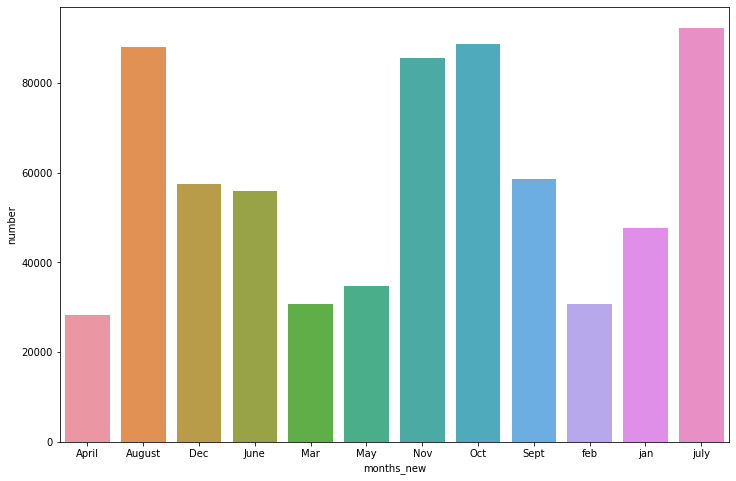

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='months_new',y='number',data=data1)


# In which year maximum number of forest fires were registered?


In [20]:
data2=df.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


<AxesSubplot:xlabel='year', ylabel='number'>

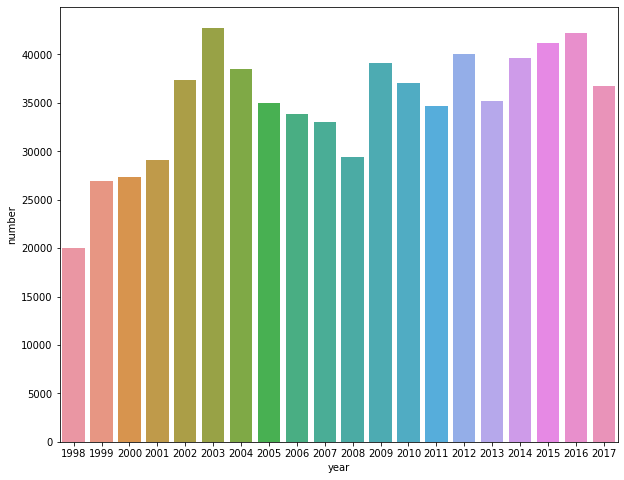

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='number',data=data2)

# In which state maximum number of forest fire were reported

In [22]:
data3=df.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


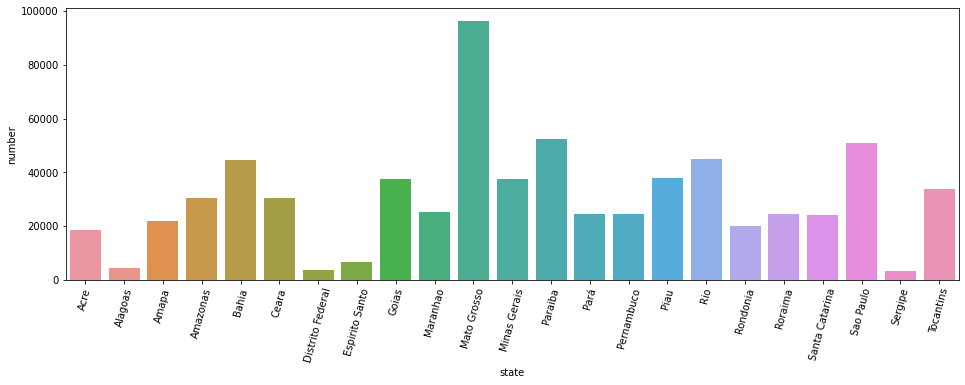

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data3)
plt.xticks(rotation=75)
plt.show()

# Find total number of fires were reported in Amazonas

In [24]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

# Display number of fires were reported in Amazonas(year-wise)

In [25]:
data4=df[df['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

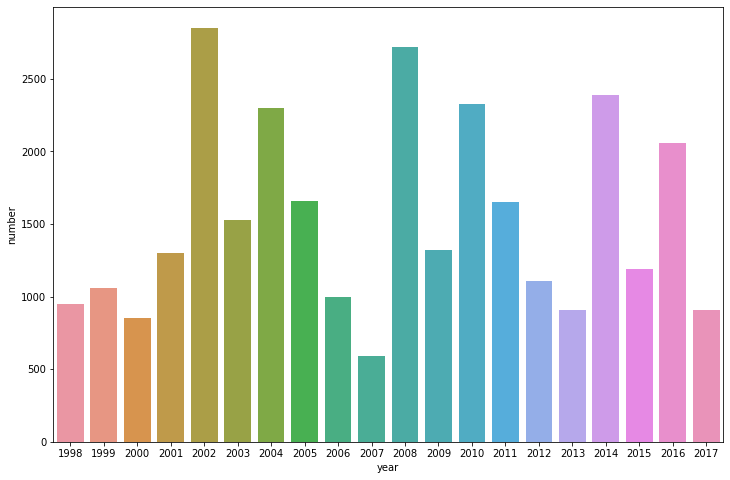

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x='year',y='number',data=data5)

# Find average number of fires were reported from highest to lowest(state-wise)

In [27]:
df.groupby('state')['number'].mean()

state
Acre                 77.255356
Alagoas              19.350000
Amapa                91.345506
Amazonas            128.243218
Bahia               187.222703
Ceara               127.314071
Distrito Federal     14.899582
Espirito Santo       27.389121
Goias               157.721841
Maranhao            105.142808
Mato Grosso         201.351523
Minas Gerais        156.800243
Paraiba             109.698573
Pará                102.561272
Pernambuco          102.502092
Piau                158.174674
Rio                  62.985865
Rondonia             84.876272
Roraima             102.029598
Santa Catarina      101.924067
Sao Paulo           213.896226
Sergipe              13.543933
Tocantins           141.037176
Name: number, dtype: float64

In [28]:
# to check values in ascending order
df.groupby('state')['number'].mean().sort_values()

state
Sergipe              13.543933
Distrito Federal     14.899582
Alagoas              19.350000
Espirito Santo       27.389121
Rio                  62.985865
Acre                 77.255356
Rondonia             84.876272
Amapa                91.345506
Santa Catarina      101.924067
Roraima             102.029598
Pernambuco          102.502092
Pará                102.561272
Maranhao            105.142808
Paraiba             109.698573
Ceara               127.314071
Amazonas            128.243218
Tocantins           141.037176
Minas Gerais        156.800243
Goias               157.721841
Piau                158.174674
Bahia               187.222703
Mato Grosso         201.351523
Sao Paulo           213.896226
Name: number, dtype: float64

In [29]:
#to check average highest to lowest
data7=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


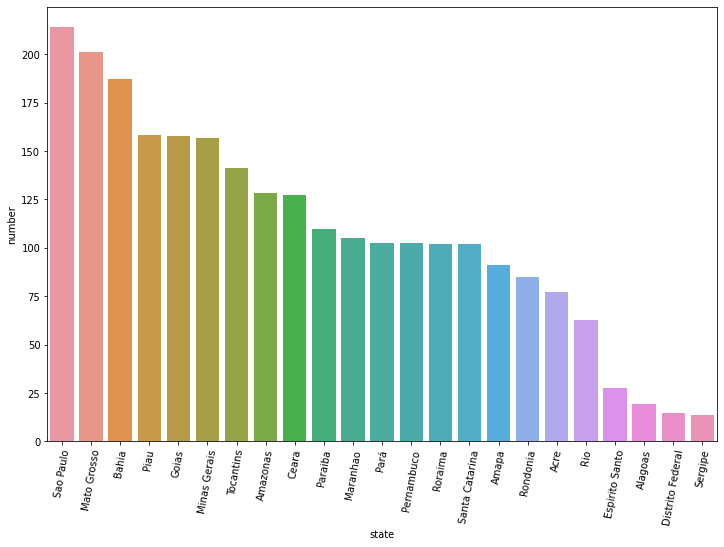

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x='state',y='number',data=data7)
plt.xticks(rotation=80)
#plt.grid()
plt.show()


# to find out state names where fire were reported in dec month

In [31]:
df[df['months_new']=="Dec"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

# Observations:

context:- Forest fires are a serious problem for the preservation of the Tropical Forests.Understanding the frequency of forest fires in a time series can help to take action to prevent them.Brazil has the largest rainforest on the planet that is the Amazon rainforest.

The data were obtained from the official website of the Kaggle Dataset.
we have data from 1998 to 2017

1.Given Dataset has 6454 rows and 5 columns and in this dataset we have 2 types of datatype which is in numerical and object.

2.In this data set we have zero null values.

3.Memory usage in this dataset is 252.2+ K
 

4.We had 32 duplicates values in this dataset


5.Total number of fire registered is 6454.


6.After analysing the data we can say that the maximum number of cases were registered in july.


7.In year 2003 the maximum number of forest fire cases were being registered.
 

 8.After analysing the data we can say that the state of Mato Grosso has the maximum number of fire cases.


9.In Amazonas state total number of forest fire were being reported is 30650 and in year 2002 there was 2852 
fire cases were reported which was the maximum number of cases being reported which is maximum number by any year.

10.After analysing the data we can say that the highest average of forest fire cases were being registered in the state of Sao Paulo which is 213 And lowest average of forest fire cases were being registered in the state of Sergipe which is 13.
 